In [13]:
from joblib import dump, load
import numpy as np

In [4]:
x_train = load('x_train_ecfp4.pkl')
x_test = load('x_test_ecfp4.pkl')
x_valid = load('x_valid_ecfp4.pkl')

In [24]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [419]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [420]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [476]:
scale_1 = Normalizer().fit(x_train)
x_train_1 = scale_1.transform(x_train)
x_test_1 = scale_1.transform(x_test)
x_valid_1 = scale_1.transform(x_valid)

In [496]:
from sklearn.decomposition import PCA, NMF

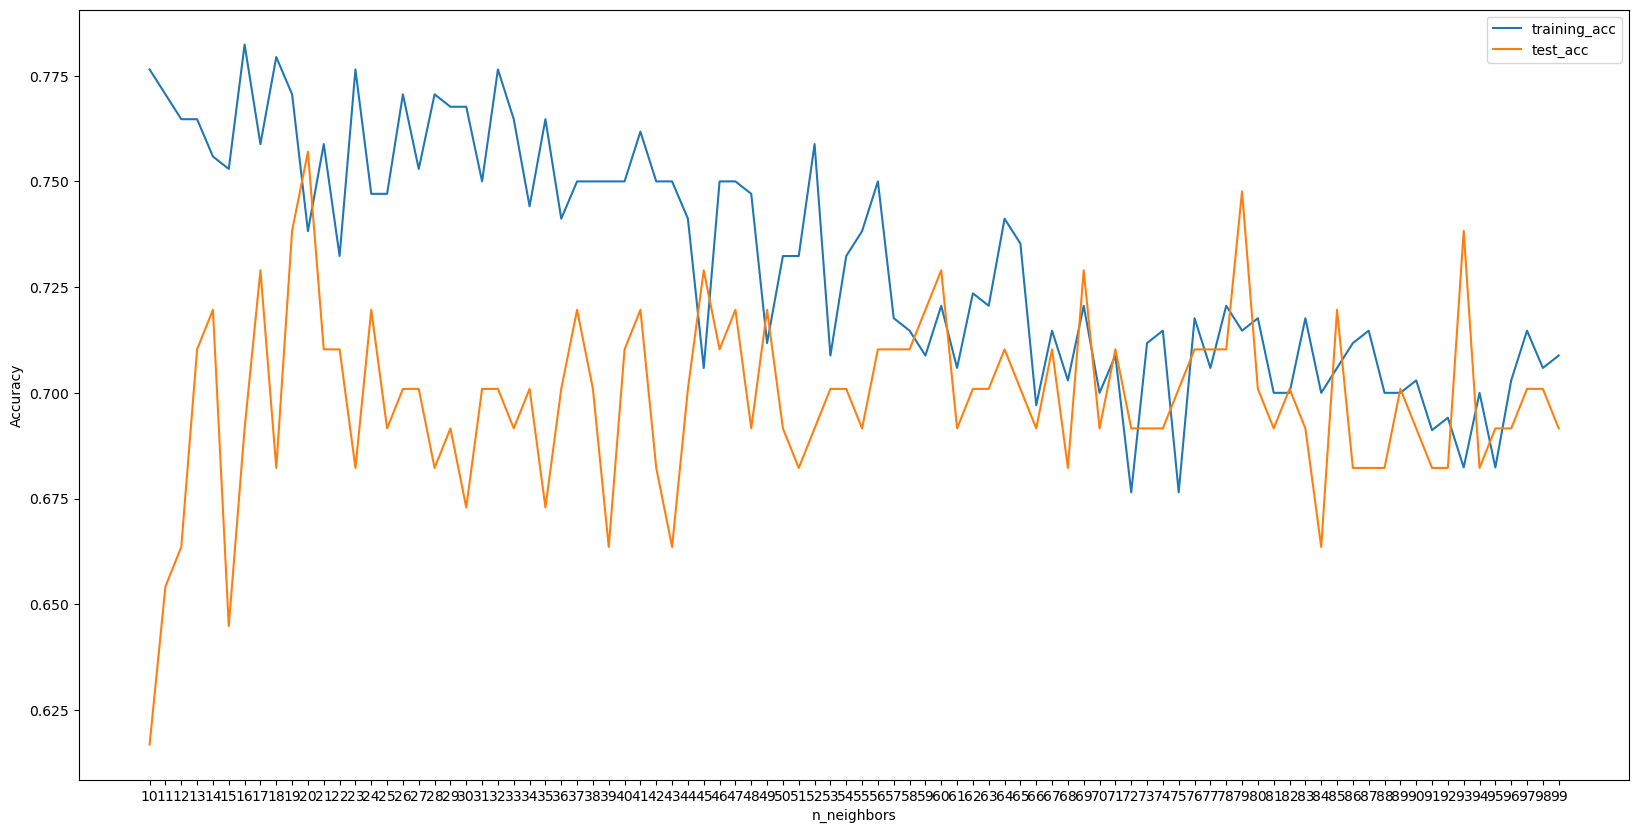

In [719]:
training_acc = []
test_acc = []

for n_components in range(10, 100, 1):
    pca = PCA(n_components=n_components, whiten=True, random_state=seed).fit(x_train_scaled)
    x_train_pca = pca.transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    knn_2c8 = KNeighborsClassifier(n_neighbors=2, weights='distance')
    knn_2c8.fit(x_train_pca, y_train)
    training_acc.append(cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = knn_2c8.predict(x_test_pca)
    test_acc.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(20, 10))
plt.plot(range(10, 100, 1), training_acc, label="training_acc")
plt.plot(range(10, 100, 1), test_acc, label="test_acc")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
xticks = np.arange(10, 100, 1)
plt.xticks(xticks)
plt.legend()

In [760]:
pca = PCA(n_components=53, whiten=True, random_state=seed).fit(x_train_1)
x_train_pca = pca.transform(x_train_1)
x_test_pca = pca.transform(x_test_1)
x_valid_pca = pca.transform(x_valid_1)

In [8]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [9]:
seed = 42

In [10]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [388]:
param_grid = {'n_neighbors': np.arange(1, 31, 1),
             'weights': ['uniform', 'distance']}

In [586]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

In [587]:
knn.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [588]:
knn.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [589]:
knn.best_score_

0.6882352941176471

In [761]:
knn_2c8 = KNeighborsClassifier(n_neighbors=2, weights='distance')

In [762]:
knn_2c8.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [222]:
matthews = make_scorer(matthews_corrcoef)

In [631]:
specificity = make_scorer(recall_score, pos_label=0)

In [763]:
score1 = cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring='accuracy')

In [764]:
score1.mean()

0.7676470588235293

In [765]:
score2 = cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring='roc_auc')

In [766]:
score2.mean()

0.8080075187969925

In [767]:
score3 = cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring=matthews)

In [768]:
score3.mean()

0.5217007805931212

In [769]:
score4 = cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring='recall')

In [770]:
score4.mean()

0.8134210526315788

In [771]:
score5 = cross_val_score(knn_2c8, x_train_pca, y_train, cv=cv, scoring=specificity)

In [772]:
score5.mean()

0.7023809523809523

In [773]:
y_pred = knn_2c8.predict(x_test_pca)

In [774]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [775]:
accuracy_score(y_test, y_pred)

0.7476635514018691

In [776]:
roc_auc_score(y_test, knn_2c8.predict_proba(x_test_pca)[:,1])

0.7902808573540281

In [777]:
matthews_corrcoef(y_test, y_pred)

0.47429510441873635

In [778]:
recall_score(y_test, y_pred)

0.7727272727272727

In [779]:
recall_score(y_test, y_pred, pos_label=0)

0.7073170731707317

In [93]:
import matplotlib.pyplot as plt

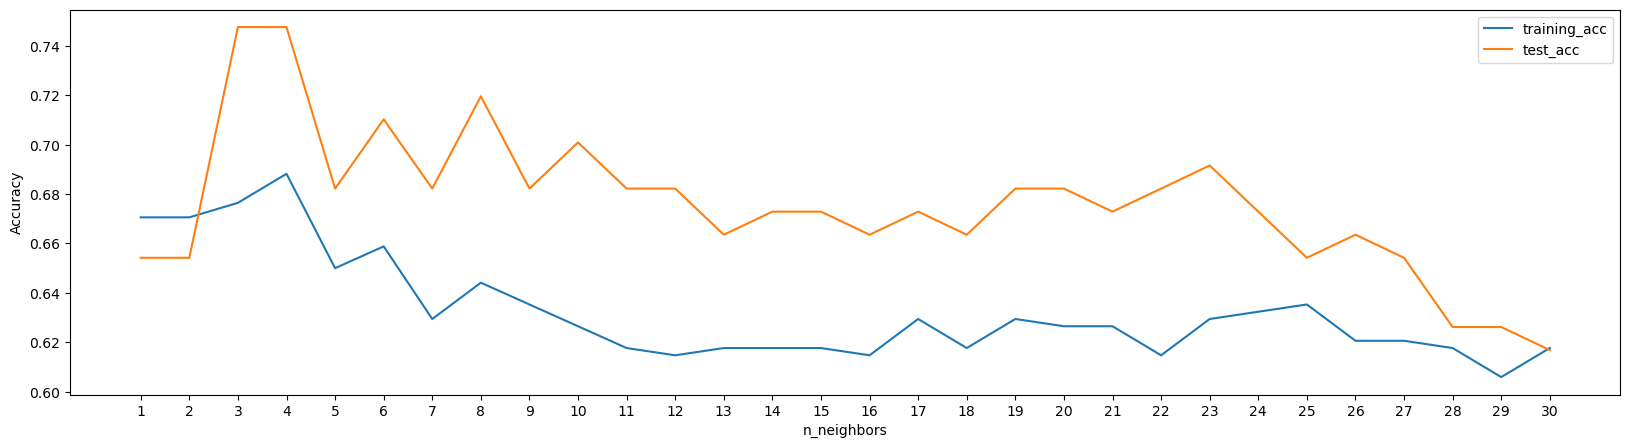

In [590]:
training_acc = []
test_acc = []

for n_neighbors in range(1, 31):
    knn_2c8 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = knn_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(20, 5))
plt.plot(range(1, 31), training_acc, label="training_acc")
plt.plot(range(1, 31), test_acc, label="test_acc")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
xticks = np.arange(1, 31, 1)
plt.xticks(xticks)
plt.legend()

In [703]:
y_pred_valid = knn_2c8.predict(x_valid_pca)

In [704]:
y_pred_valid

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [705]:
accuracy_score(y_valid, y_pred_valid)

0.7906976744186046

In [706]:
roc_auc_score(y_valid, knn_2c8.predict_proba(x_valid_pca)[:,1])

0.8243316966721222

In [707]:
matthews_corrcoef(y_valid, y_pred_valid)

0.580209722167606

In [708]:
recall_score(y_valid, y_pred_valid)

0.7872340425531915

In [709]:
recall_score(y_valid, y_pred_valid, pos_label=0)

0.7948717948717948

In [710]:
dump(knn_2c8, '2c8_ecfp4_knn.pkl', compress=3)

['2c8_ecfp4_knn.pkl']